<a href="https://colab.research.google.com/github/PaoloBarba/ADM_HW2-Group18/blob/main/soukaina_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algorithmic Methods of Data Mining**

#Academic year 2022–2023

# Homework 2 - Instagram Profiles & Posts

Authors: Barba Paolo, Bellaroba Albachiara, Soukaina Alaoui, Gasbarri Francesca.

#Import the packages and upload datasets


In [1]:
import pandas as pd
import random
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from tqdm import tqdm     
import statsmodels.api as sm
from datetime import datetime
from time import strptime



In [2]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# [RQ3] Now it's important to understand the most common times in which users publish their posts


In [ ]:
#What is the most common time in which users publish their posts?
file =("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv" )
posts = pd.read_csv(file, usecols= ['cts'], sep='\t')
def publishing_time(data, count):
    #convert cts column to datetime
    pub_time = pd.to_datetime(data.cts).dt.floor('Min').dt.time
    #group by publishing time
    grouping = pub_time.groupby(pub_time).size().sort_values(ascending=False).head(count)
    timing = grouping.index.to_list()
    for i in timing:
        print('{:02d}:{:02d}:{:02d}'.format(i.hour, i.minute, i.second))
#publishing_time(posts, 1)
print('The most common time in which users publish their posts is at:', end=' ')
publishing_time(posts, 1)

The most common time in which users publish their posts is at: 18:00:00


In [ ]:
#Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

def time_interval(data, intervals):
    datex = pd.DataFrame(pd.to_datetime(data.cts))
    datex.set_index(pd.DatetimeIndex(datex.cts), inplace=True)
    calc = 0
    value_counts = pd.DataFrame()
    #loop over interval list
    for interval in intervals:
        start, end = interval
        tot = datex.between_time(start, end).count()
        tot = int(tot[0])
        RES = pd.DataFrame({'time interval (start, end)' : [interval], 'total posts' : tot})
        value_counts = value_counts.append(RES)
        calc += tot
    value_counts.reset_index(drop = True, inplace = True)
    print(value_counts)
    sns.set()

    ax = value_counts.plot(figsize=(14,8), kind='bar', color = 'rgbkymc', zorder=3)
    plt.setp(ax, xlabel='The time intervals', ylabel='Number of posts', title = 'Posts for each time interval')
    plt.show()

  time interval (start, end)  total posts
0       (06:00:00, 10:59:59)      6378572
1       (11:00:00, 13:59:59)      5614715
2       (14:00:00, 16:59:59)      6763037
3       (17:00:00, 19:59:59)      7409907
4       (20:00:00, 23:59:59)      8915794
5       (00:00:00, 02:59:59)      4213617
6       (03:00:00, 05:59:59)      3411223


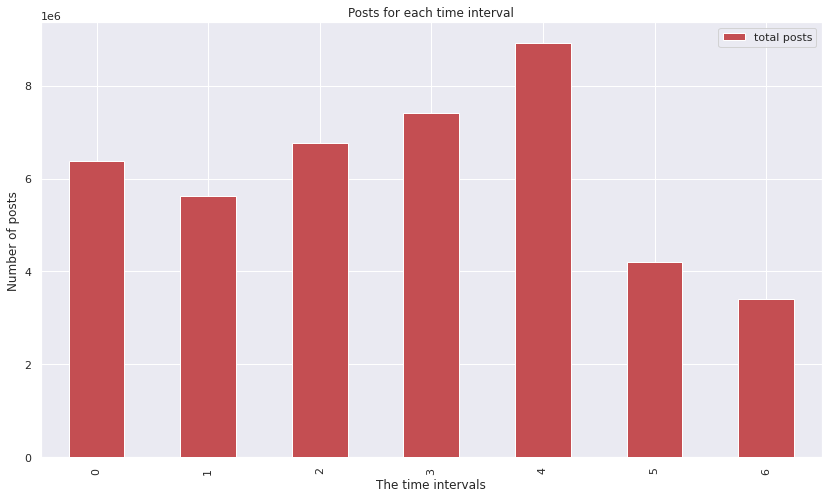

In [ ]:
#Use the function that you created in the previous literal to plot the number of posts between the following time intervals:

#list of tuple of time intervals
time_intervals = [('06:00:00', '10:59:59'),('11:00:00', '13:59:59'),('14:00:00', '16:59:59'),('17:00:00', '19:59:59'),('20:00:00', '23:59:59'),('00:00:00', '02:59:59'),('03:00:00', '05:59:59')]
#plot the number of posts between the given time intervals 
time_interval(posts, time_intervals)

# [RQ6] It's time to get information from the user posting effectiveness.

In [3]:
#What is the average time (days and minutes) a user lets pass before publishing another post? 
#Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

file =("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv" )
posts = pd.read_csv(file, usecols= ['profile_id','cts'], sep='\t')



In [4]:
time = pd.DataFrame(posts[['profile_id','cts']])

time[['cts']] = time[['cts']].apply(pd.to_datetime)
time=time.sort_values(by=['cts'])


In [5]:
time=time.assign(cts2=time.groupby('profile_id').cts.shift(-1))
time = pd.DataFrame(time[['profile_id','cts','cts2']])
time['time_passed'] = time['cts2'] - time['cts']
print('Average time before publishing another post is: ',time['time_passed'].mean())
time.head(5)

Average time before publishing another post is:  33 days 04:45:21.097663469


,profile_id,cts,cts2,time_passed
35149671,3.0,2010-07-19 01:12:23,2010-08-21 06:40:27,33 days 05:28:04
34345686,4.0,2010-07-22 12:19:51,2010-07-24 03:18:08,1 days 14:58:17
7017555,4.0,2010-07-24 03:18:08,2010-09-03 07:22:03,41 days 04:03:55
4225968,3.0,2010-08-21 06:40:27,2010-09-05 21:48:24,15 days 15:07:57
30838561,4.0,2010-09-03 07:22:03,2011-01-30 20:18:02,149 days 12:55:59


In [6]:
file2 =("/content/drive/MyDrive/ADM_HW2/instagram_profiles.csv" )
profiles = pd.read_csv(file2, usecols= ['profile_id','following','followers'], sep='\t')
timepass1 = pd.DataFrame(profiles[['profile_id','following','followers']])



In [7]:
time = pd.concat([time, timepass1], ignore_index=True, sort=False)
#time=time.sort_values(by=['time_passed'])
time.head(5)

,profile_id,cts,cts2,time_passed,following,followers
0,3.0,2010-07-19 01:12:23,2010-08-21 06:40:27,33 days 05:28:04,NaN,NaN
1,4.0,2010-07-22 12:19:51,2010-07-24 03:18:08,1 days 14:58:17,NaN,NaN
2,4.0,2010-07-24 03:18:08,2010-09-03 07:22:03,41 days 04:03:55,NaN,NaN
3,3.0,2010-08-21 06:40:27,2010-09-05 21:48:24,15 days 15:07:57,NaN,NaN
4,4.0,2010-09-03 07:22:03,2011-01-30 20:18:02,149 days 12:55:59,NaN,NaN


In [8]:
from datetime import timedelta
users_pub = time.loc[time['time_passed'] != timedelta(days = 0, minutes = 0, seconds = 0), 'profile_id'].value_counts().head(3)
users_pub

5.421037e+09    600
1.287812e+10    587
1.241325e+10    570
Name: profile_id, dtype: int64

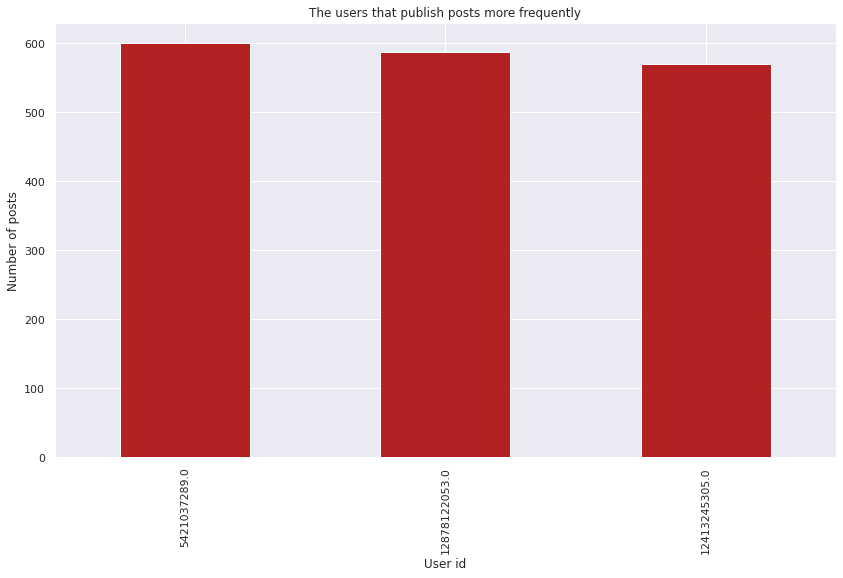

In [10]:
import seaborn as sns

#users_pub = time.loc[time['time_passed'] != timedelta(days = 0, minutes = 0, seconds = 0), 'profile_id'].value_counts().head(3)

users_pub.plot.bar(figsize = (14,8), color = 'firebrick', zorder=3)
plt.title('The users that publish posts more frequently')
plt.xlabel('User id')
plt.ylabel('Number of posts')
sns.set()
plt.show()



In [ ]:
#Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

file =("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv" )
posts = pd.read_csv(file, usecols= ['cts','numbr_likes','number_comments'], sep='\t')


def time_interval2(data, intervals):
    datex = pd.DataFrame(pd.to_datetime(data.cts))
    datex.set_index(pd.DatetimeIndex(datex.cts), inplace=True)
    calc = 0
    value_counts = pd.DataFrame()
    #loop over interval list
    for interval in intervals:
        start, end = interval
        tot = datex.between_time(start, end).count()
        tot = int(tot[0])
        RES = pd.DataFrame({'time interval (start, end)' : [interval], 'total posts' : tot})
        value_counts = value_counts.append(RES)
        calc += tot
    value_counts.reset_index(drop = True, inplace = True)
    print(value_counts)
    sns.set()

    ax = value_counts.plot(figsize=(14,8), kind='bar', color = 'rgbkymc', zorder=3)
    plt.setp(ax, xlabel='The time intervals', ylabel='Number of likes', title = 'Likes for each time interval')
    plt.show()


# **Algorithmic Question**

#[AQ1] Given the following pseudocode, answer the questions:


In [ ]:
#What is the output of this algorithm? Describe the mechanism of the algorithm in detail . We do not want to know only its final result. (Describe one example on your own)


In [ ]:
#What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N?


In [ ]:
#Is this algorithm the optimal one to produce this output? If not, can you suggest a better algorithm to perform the same task?

# [AQ2] Considering the following problem, answer the questions:


1- Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.

In [ ]:
#Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.

def cut_recursive(N):
    # base case 1 = 0 + 1 zero cut one piece
    if (N == 1):
        return 0
    # base case 2 = 1 + 1 one cuts two pieces
    elif (N == 2):
        return 1
    #  base case 3 = 2 + 1 two cuts three pieces
    elif (N == 3):
        return 2
    # More than two cuts
    else:
        # Make cuts in different places, take the maximum possible
        max_possible = 0
        for i in range(2, N - 1):
            max_possible = max(max_possible, max(i * (N - i), i * cut_recursive(N - i)))
    # Return the maximum possible value 
    return max_possible


2- Show that the algorithm has exponential running time.

- The recusive algorithm while calculating the max_possible the function calls itself several times which form a tree most of it's nodes are redundant, therefore the time complexity is exponential O(2^n).

3- Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.

In [ ]:
#Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.

def cut_dypro(N):
    pol=[]
    for i in range(N + 1):
        pol.append(0)
    for i in range(1, N + 1):
        max_possible = 0
        for j in range(1, i):
            max_possible = max(max_possible, (i - j) * j, j * pol[i - j])
            pol[i] = max_possible
    return pol[N]


- Compute its running-time complexity.


Time Complexity of the Dynamic Programming solution is O(n^2) 

4- Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).

In [ ]:
#Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).

#The running time of recursive algorithm for the sizes in the range of [2, 25]

import time
from datetime import timedelta
start_time = time.monotonic()
print([cut_recursive(n) for n in range(2,25)])
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))


[1, 2, 4, 6, 9, 12, 18, 27, 36, 54, 81, 108, 162, 243, 324, 486, 729, 972, 1458, 2187, 2916, 4374, 6561]
0:00:00.048916


In [ ]:
#The running time of dynamic programming algorithm for the sizes in the range of [2, 25]

import time
from datetime import timedelta
start_time = time.monotonic()
print([cut_dypro(n) for n in range(2,25)])
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))


[1, 2, 4, 6, 9, 12, 18, 27, 36, 54, 81, 108, 162, 243, 324, 486, 729, 972, 1458, 2187, 2916, 4374, 6561]
0:00:00.000964


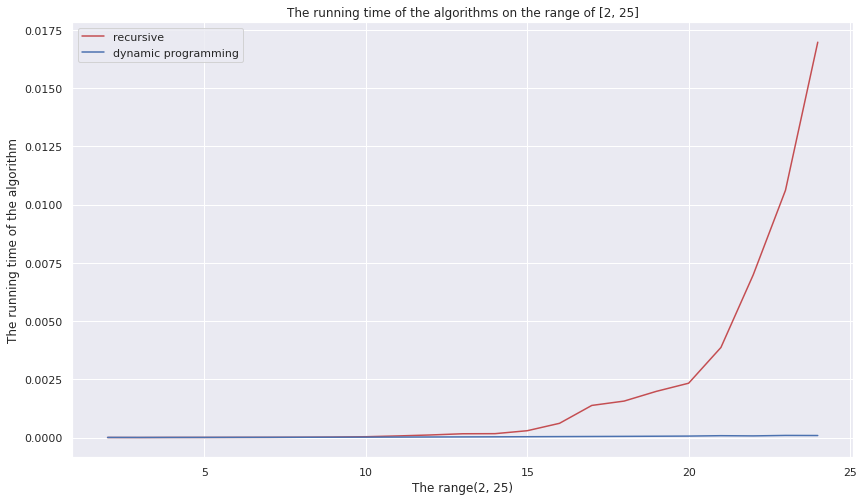

In [ ]:
#plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import timeit

ns1 = range(2,25)
ts1 = [timeit.timeit('cut_recursive({})'.format(n),
                    globals=globals(),
                    number=1)
         for n in ns1]
ns2 = range(2,25)
ts2 = [timeit.timeit('cut_dypro({})'.format(n),
                    globals=globals(),
                    number=1)
         for n in ns2]
sns.set()
figure(figsize=(14, 8))
plt.plot(ns1, ts1, '-r', label= 'recursive')
plt.plot(ns2, ts2, '-b', label= 'dynamic programming')
plt.xlabel('The range(2, 25)') 
plt.ylabel('The running time of the algorithm') 
plt.title('The running time of the algorithms on the range of [2, 25]')
plt.legend()
plt.show()




From the plot we can see that the dynamic programming algorithm running time is much less than the recursive algorithm, hence it makes the code run faster and reduce the time complexity.


